## Library imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage  

## Reading the Dataset

In [2]:
df = pd.read_csv('Clustering_cardata.csv')
print(df.shape)
print(df.dtypes)
df.head()

(25, 18)
Resp.Id                            int64
Indian Technlogy high order        int64
Buy Made in India                  int64
Value for money                    int64
Convenience over style             int64
Don't do waste full expenditure    int64
No compromise on safety            int64
Saver not spender                  int64
Try new things                     int64
Be part of a changing world        int64
Purchase Intentions                int64
Occupation                         int64
Family income                      int64
Family size                        int64
Marital Status                     int64
Education                          int64
Age                                int64
Nature of Job                      int64
dtype: object


,Resp.Id,Indian Technlogy high order,Buy Made in India,Value for money,Convenience over style,Don't do waste full expenditure,No compromise on safety,Saver not spender,Try new things,Be part of a changing world,Purchase Intentions,Occupation,Family income,Family size,Marital Status,Education,Age,Nature of Job
0,1,5,5,3,2,3,3,4,1,1,1,2,4,2,1,3,3,1
1,2,3,3,5,4,4,5,4,1,1,0,2,2,1,2,3,2,1
2,3,1,1,1,2,1,2,1,4,4,0,2,1,3,1,3,1,1
3,4,5,5,4,2,3,4,3,2,2,1,2,4,2,1,3,3,1
4,5,2,2,4,5,4,5,4,2,2,0,2,4,3,2,3,2,1


In [3]:
df = df.drop('Resp.Id',axis=1)
df

,Indian Technlogy high order,Buy Made in India,Value for money,Convenience over style,Don't do waste full expenditure,No compromise on safety,Saver not spender,Try new things,Be part of a changing world,Purchase Intentions,Occupation,Family income,Family size,Marital Status,Education,Age,Nature of Job
0,5,5,3,2,3,3,4,1,1,1,2,4,2,1,3,3,1
1,3,3,5,4,4,5,4,1,1,0,2,2,1,2,3,2,1
2,1,1,1,2,1,2,1,4,4,0,2,1,3,1,3,1,1
3,5,5,4,2,3,4,3,2,2,1,2,4,2,1,3,3,1
4,2,2,4,5,4,5,4,2,2,0,2,4,3,2,3,2,1
5,2,2,1,2,1,1,1,5,5,1,2,4,2,1,3,1,1
6,3,3,2,1,1,1,1,5,4,0,3,2,1,2,4,1,3
7,1,1,1,2,1,2,1,4,4,0,2,1,3,2,3,2,1
8,4,5,3,3,3,3,4,1,1,1,2,4,2,1,3,3,1
9,1,1,4,4,3,4,4,2,2,0,2,1,2,2,3,3,1


## Optimal cluster number via Elbow Method

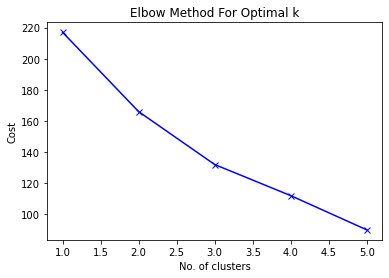

In [4]:
cost = []
K = range(1,6)
for k_num in list(K):
    kmode = KModes(n_clusters=k_num, init = "random", n_init = 5
                  # , verbose=1
                  )
    kmode.fit_predict(df)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

## Taking k = 3

In [5]:
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(df)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4, cost: 140.0
Run 1, iteration: 2/100, moves: 0, cost: 140.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2, cost: 146.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 6, cost: 144.0
Run 3, iteration: 2/100, moves: 6, cost: 133.0
Run 3, iteration: 3/100, moves: 1, cost: 133.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1, cost: 158.0
Run 4, iteration: 2/100, moves: 0, cost: 158.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 3, cost: 133.0
Run 5, iteration: 2/100, moves: 0, cost: 133.0
Best run was number 3


array([0, 1, 2, 0, 1, 2, 2, 1, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 0, 0, 2, 1,
       0, 0, 2], dtype=uint16)

In [6]:
df.insert(0, "cluster_number", clusters, True)
df.head()

,cluster_number,Indian Technlogy high order,Buy Made in India,Value for money,Convenience over style,Don't do waste full expenditure,No compromise on safety,Saver not spender,Try new things,Be part of a changing world,Purchase Intentions,Occupation,Family income,Family size,Marital Status,Education,Age,Nature of Job
0,0,5,5,3,2,3,3,4,1,1,1,2,4,2,1,3,3,1
1,1,3,3,5,4,4,5,4,1,1,0,2,2,1,2,3,2,1
2,2,1,1,1,2,1,2,1,4,4,0,2,1,3,1,3,1,1
3,0,5,5,4,2,3,4,3,2,2,1,2,4,2,1,3,3,1
4,1,2,2,4,5,4,5,4,2,2,0,2,4,3,2,3,2,1


## For 3 clusters, breaking dataset into 3

In [7]:
cluster1 = df[df['cluster_number']==0]
cluster2 = df[df['cluster_number']==1]
cluster3 = df[df['cluster_number']==2]
df.columns

Index(['cluster_number', 'Indian Technlogy high order', 'Buy Made in India',
       'Value for money', 'Convenience over style',
       'Don't do waste full expenditure', 'No compromise on safety',
       'Saver not spender', 'Try new things', 'Be part of a changing world',
       'Purchase Intentions', 'Occupation', 'Family income', 'Family size',
       'Marital Status', 'Education', 'Age', 'Nature of Job'],
      dtype='object')

## For Cluster 1

In [8]:
cluster1_ct = cluster1.mode()
cluster1_ct = cluster1_ct.rename(index={0: 'Mode', 1: 'Mode_second', 2: 'Mode_third'})
mean_val = cluster1.mean().to_frame().T
mean_val = mean_val.rename(index={0: 'Mean'})
cluster1_ct = pd.concat([cluster1_ct, mean_val])
cluster1_ct = cluster1_ct.round(1)
cluster1_ct

,cluster_number,Indian Technlogy high order,Buy Made in India,Value for money,Convenience over style,Don't do waste full expenditure,No compromise on safety,Saver not spender,Try new things,Be part of a changing world,Purchase Intentions,Occupation,Family income,Family size,Marital Status,Education,Age,Nature of Job
Mode,0.0,4.0,5.0,3.0,2.0,3.0,3.0,4.0,1.0,1.0,1.0,2.0,4.0,2.0,1.0,3.0,3.0,1.0
Mean,0.0,4.4,4.7,2.7,2.1,2.8,2.6,2.6,1.2,1.4,0.7,1.8,3.4,2.4,1.3,3.0,2.8,1.2


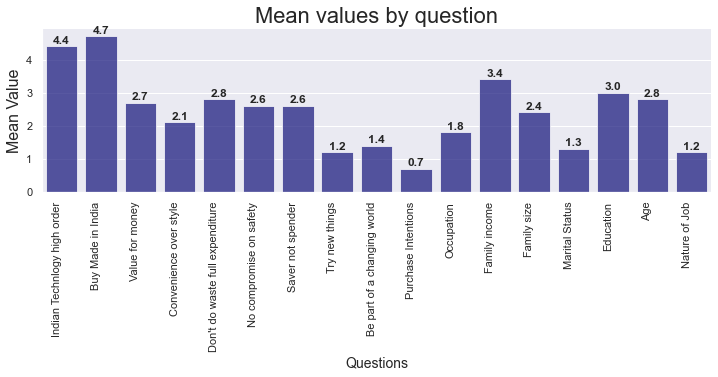

In [9]:
sns.set(style = "darkgrid", rc = {"lines.linewidth": 4}, palette = 'tab10')
a = pd.DataFrame(cluster1_ct.iloc[1])
a = a.drop('cluster_number')
plt.figure(figsize = (12, 3))
ax= sns.barplot(x = a.index, y = a.columns[0], data = a, alpha = 0.7, color = 'darkblue')
ax.set_title(a.columns[0]+' values by question', size = 22)
ax.set_xlabel('Questions', size = 14)
ax.set_ylabel(a.columns[0]+' Value', size = 16)
ax.set_xticklabels(a.index, rotation = 90, ha = 'right')
ax.bar_label(ax.containers[0], padding = 1, fmt = '%.1f', fontweight = 'bold')
sns.despine()
plt.show()

## For Cluster 2

In [10]:
cluster2_ct = cluster2.mode()
cluster2_ct = cluster2_ct.rename(index={0: 'Mode', 1: 'Mode_second', 2: 'Mode_third'})
mean_val = cluster2.mean().to_frame().T
mean_val = mean_val.rename(index={0: 'Mean'})
cluster2_ct = pd.concat([cluster2_ct, mean_val])
cluster2_ct = cluster2_ct.round(1)
cluster2_ct

,cluster_number,Indian Technlogy high order,Buy Made in India,Value for money,Convenience over style,Don't do waste full expenditure,No compromise on safety,Saver not spender,Try new things,Be part of a changing world,Purchase Intentions,Occupation,Family income,Family size,Marital Status,Education,Age,Nature of Job
Mode,1.0,2.0,1.0,5.0,5.0,5.0,5.0,4.0,1.0,1.0,0.0,2.0,1.0,3.0,2.0,3.0,2.0,1.0
Mode_second,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
Mean,1.0,2.0,1.6,4.1,4.3,3.9,4.3,3.7,1.9,1.7,0.0,2.1,1.9,2.4,2.0,3.0,2.3,1.4


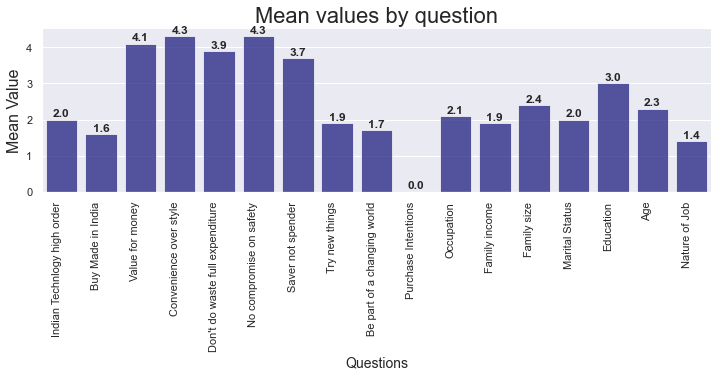

In [11]:
sns.set(style = "darkgrid", rc = {"lines.linewidth": 4}, palette = 'tab10')
a = pd.DataFrame(cluster2_ct.iloc[2])
a = a.drop('cluster_number')
plt.figure(figsize = (12, 3))
ax= sns.barplot(x = a.index, y = a.columns[0], data = a, alpha = 0.7, color = 'darkblue')
ax.set_title(a.columns[0]+' values by question', size = 22)
ax.set_xlabel('Questions', size = 14)
ax.set_ylabel(a.columns[0]+' Value', size = 16)
ax.set_xticklabels(a.index, rotation = 90, ha = 'right')
ax.bar_label(ax.containers[0], padding = 1, fmt = '%.1f', fontweight = 'bold')
sns.despine()
plt.show()

## For Cluster 3

In [12]:
cluster3_ct = cluster3.mode()
cluster3_ct = cluster3_ct.rename(index={0: 'Mode', 1: 'Mode_second', 2: 'Mode_third'})
mean_val = cluster3.mean().to_frame().T
mean_val = mean_val.rename(index={0: 'Mean'})
cluster3_ct = pd.concat([cluster3_ct, mean_val])
cluster3_ct = cluster3_ct.round(1)
cluster3_ct

,cluster_number,Indian Technlogy high order,Buy Made in India,Value for money,Convenience over style,Don't do waste full expenditure,No compromise on safety,Saver not spender,Try new things,Be part of a changing world,Purchase Intentions,Occupation,Family income,Family size,Marital Status,Education,Age,Nature of Job
Mode,2.0,2.0,3.0,1.0,2.0,1.0,1.0,1.0,5.0,4.0,1.0,2.0,4.0,2.0,1.0,3.0,1.0,1.0
Mode_second,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mean,2.0,2.1,2.4,1.5,1.8,1.0,1.1,1.0,4.9,4.4,0.6,2.2,3.0,1.8,1.2,3.2,1.1,1.5


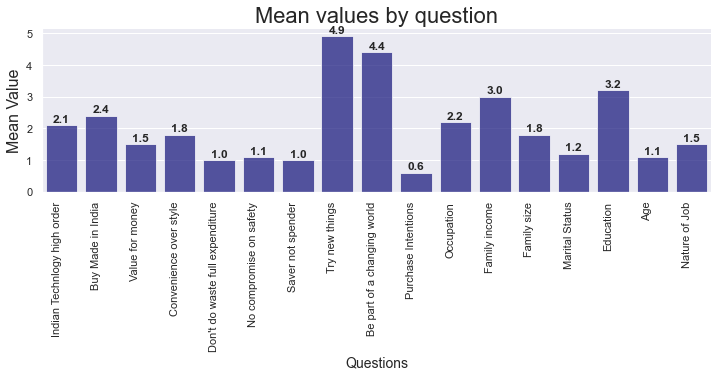

In [13]:
sns.set(style = "darkgrid", rc = {"lines.linewidth": 4}, palette = 'tab10')
a = pd.DataFrame(cluster3_ct.iloc[2])
a = a.drop('cluster_number')
plt.figure(figsize = (12, 3))
ax= sns.barplot(x = a.index, y = a.columns[0], data = a, alpha = 0.7, color = 'darkblue')
ax.set_title(a.columns[0]+' values by question', size = 22)
ax.set_xlabel('Questions', size = 14)
ax.set_ylabel(a.columns[0]+' Value', size = 16)
ax.set_xticklabels(a.index, rotation = 90, ha = 'right')
ax.bar_label(ax.containers[0], padding = 1, fmt = '%.1f', fontweight = 'bold')
sns.despine()
plt.show()

## Cluster analysis
### -------------------------------------

### Cluster 1 : Value for money Cars
### 1. Want the best value for money
### 2. Don't have high disposable income to spend on extravagant features
### 3. Income range is under 1 lakh
### 4. In the age bracket of 31-40 leaning more towards 40s
### 5. Education wise, they are graduates and since, they don't have too much money, they might be paying down loans

### ----------------------------------------

## Cluster 2 : Indian Made
### 1. They are in the age bracket of 31-40
### 2. Their income is in the range 1.6-2 lakhs which means that they have more disposable income
### 3. They prefer and want Indian made cars with Indian technology
### 4. They have less emphasis on experimentation and prefer tried and tested cars
### 5. They are well educated

### ---------------------------------------

## Cluster 3 : Foreign cars
### 1. They fall in the age bracket of 21-30
### 2. They are well educated and have completed their graduation
### 3. Their income is in the range of 1.6-2 lakhs which means that they have more disposable income
### 4. From the bar chart we are able to deduce that individuals in cluster 3 perfer new age cars and want to be part of an evolving world.
### 5. They place less emphasis on Indian made cars, value for money, convenience, etc.